<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-29 17:34:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  17.2MB/s    in 13s     

2025-06-29 17:34:18 (15.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


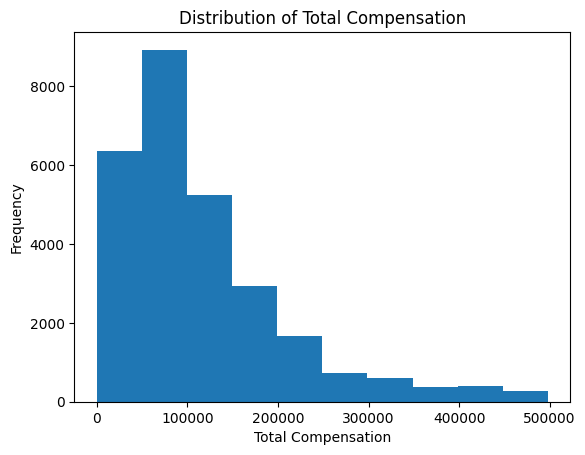

In [9]:
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

df_comptotal = pd.read_sql_query(QUERY, conn)

# Convert 'CompTotal' to numeric, coercing errors
df_comptotal['CompTotal'] = pd.to_numeric(df_comptotal['CompTotal'], errors='coerce')
# Remove rows where 'CompTotal' is NaN after coercion
df_comptotal.dropna(subset=['CompTotal'], inplace=True)

# Filter out extremely large values that might skew the visualization
df_comptotal = df_comptotal[df_comptotal['CompTotal'] < 500000].copy()

plt.hist(df_comptotal['CompTotal'], bins=10)
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


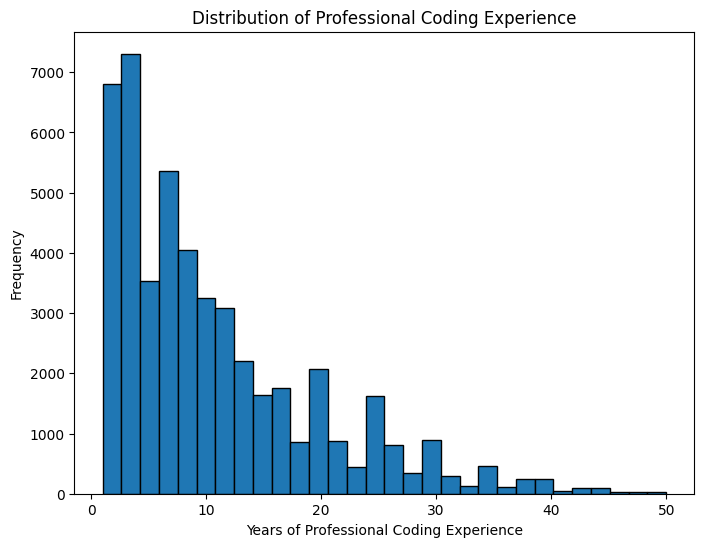

In [10]:
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""

df_yearscodepro = pd.read_sql_query(QUERY, conn)

# Convert 'YearsCodePro' to numeric, coercing errors
df_yearscodepro['YearsCodePro'] = pd.to_numeric(df_yearscodepro['YearsCodePro'], errors='coerce')
# Remove rows where 'YearsCodePro' is NaN after coercion
df_yearscodepro.dropna(subset=['YearsCodePro'], inplace=True)

plt.figure(figsize=(8, 6))
plt.hist(df_yearscodepro['YearsCodePro'], bins=30, edgecolor='black') # Adjust bins as needed
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Professional Coding Experience')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


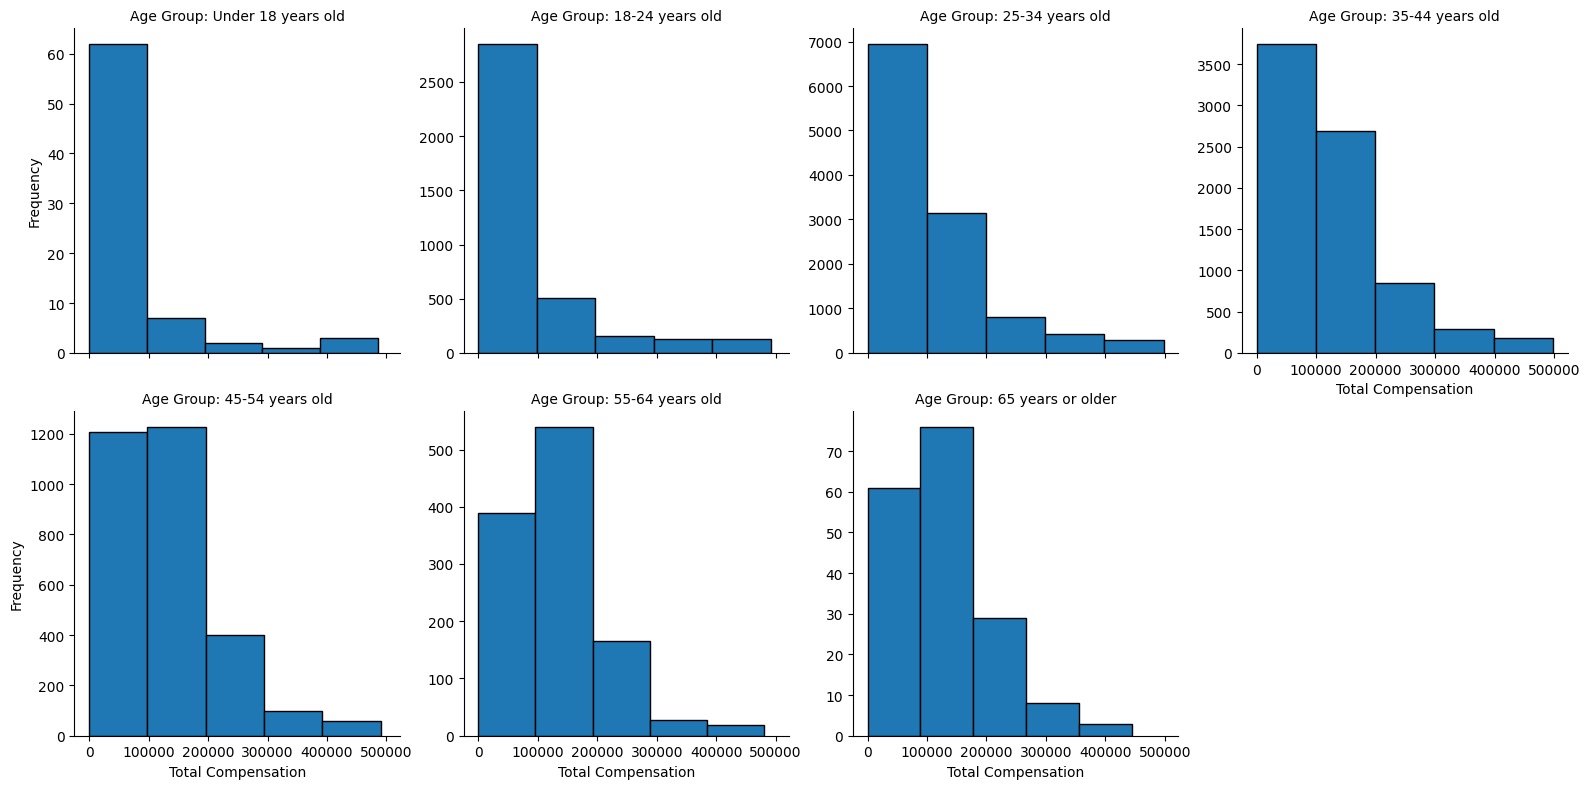

In [11]:
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""

df_age_comptotal = pd.read_sql_query(QUERY, conn)

# Convert 'CompTotal' to numeric, coercing errors
df_age_comptotal['CompTotal'] = pd.to_numeric(df_age_comptotal['CompTotal'], errors='coerce')
# Remove rows where 'CompTotal' is NaN after coercion
df_age_comptotal.dropna(subset=['Age', 'CompTotal'], inplace=True)

# Filter out extremely large values that might skew the visualization
df_age_comptotal = df_age_comptotal[df_age_comptotal['CompTotal'] < 500000].copy()

# Define age groups in the desired order for plotting
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Convert 'Age' to a categorical type with a defined order and remove 'Prefer not to say'
df_age_comptotal['Age'] = pd.Categorical(df_age_comptotal['Age'], categories=age_order, ordered=True)
df_age_comptotal.dropna(subset=['Age'], inplace=True) # This will drop rows where Age was 'Prefer not to say'


# Create a FacetGrid for plotting histograms by Age group
g = sns.FacetGrid(df_age_comptotal, col='Age', col_wrap=4, height=4, aspect=1, sharey=False)
g.map(plt.hist, 'CompTotal', bins=5, edgecolor='black') # Adjust bins as needed
g.set_axis_labels('Total Compensation', 'Frequency')
g.set_titles('Age Group: {col_name}')
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


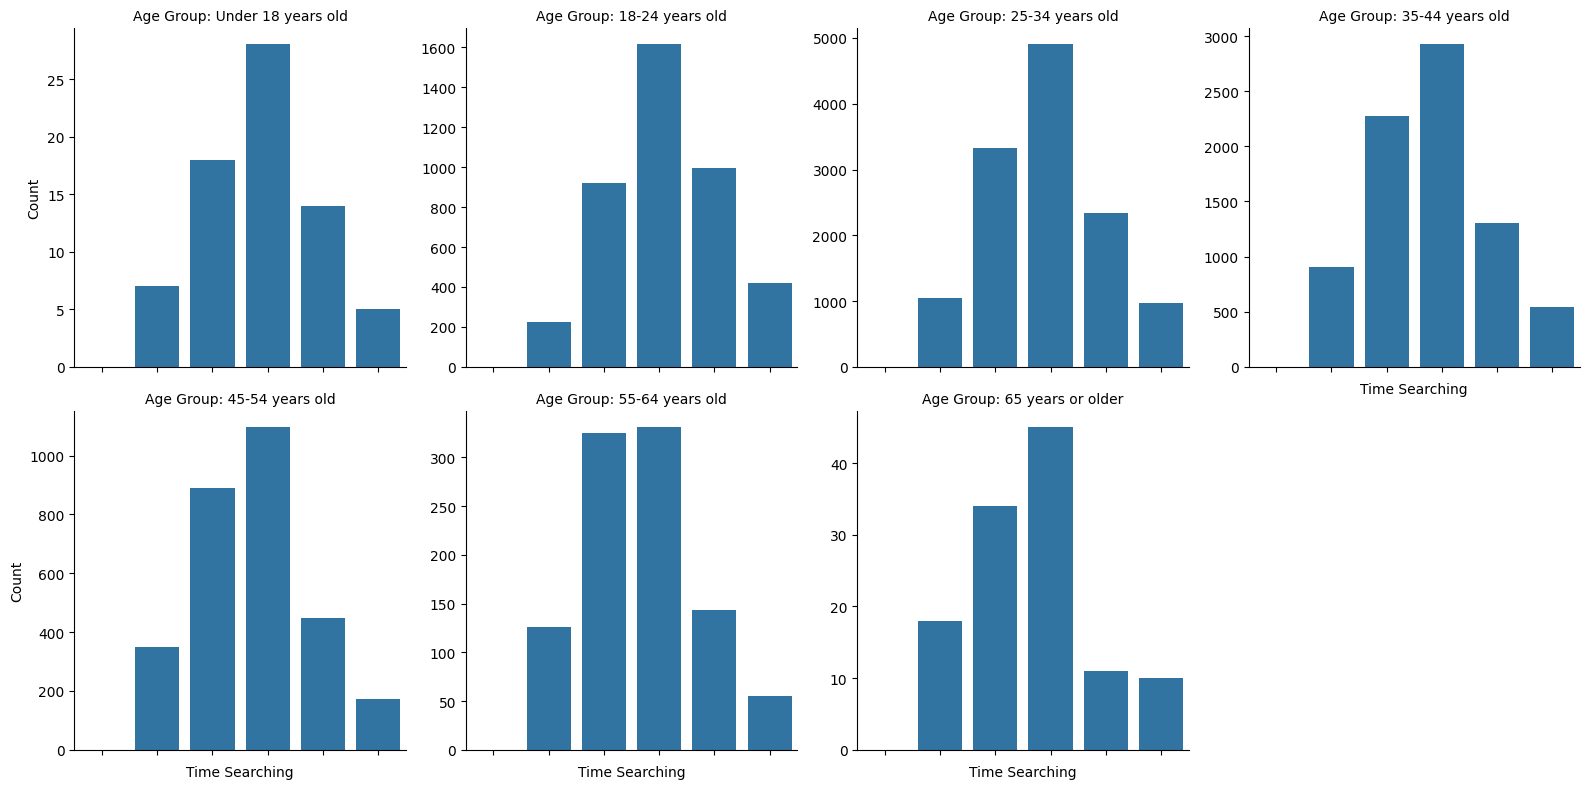

In [12]:
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""

df_age_timesearching = pd.read_sql_query(QUERY, conn)

# Define the desired order for TimeSearching categories
timesearching_order = [
    'None',
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
]

# Convert 'TimeSearching' to a categorical type with a defined order
df_age_timesearching['TimeSearching'] = pd.Categorical(df_age_timesearching['TimeSearching'], categories=timesearching_order, ordered=True)

# Define the desired order for age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Convert 'Age' to a categorical type with a defined order and remove 'Prefer not to say'
df_age_timesearching['Age'] = pd.Categorical(df_age_timesearching['Age'], categories=age_order, ordered=True)
df_age_timesearching.dropna(subset=['Age'], inplace=True) # This will drop rows where Age was 'Prefer not to say'


# Create a FacetGrid for plotting histograms by Age group
g = sns.FacetGrid(df_age_timesearching, col='Age', col_wrap=4, height=4, aspect=1, sharey=False)

# Use a countplot on each facet since TimeSearching is a categorical variable
# Rotate x-axis labels for better readability
g.map(sns.countplot, 'TimeSearching', order=timesearching_order)
g.set_xticklabels(rotation=90)
g.set_axis_labels('Time Searching', 'Count')
g.set_titles('Age Group: {col_name}')

plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


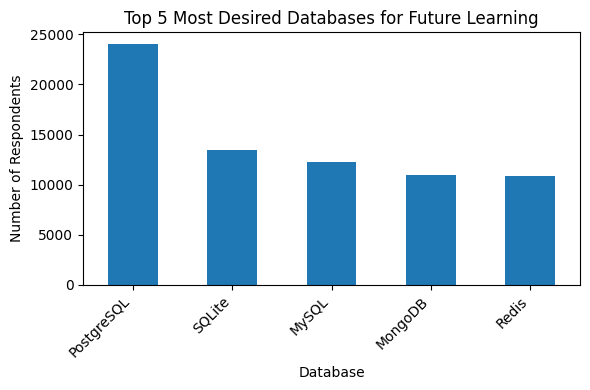

In [13]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""

df_databases_want = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each database
database_counts = df_databases_want['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().value_counts()

# Get the top 5 databases
top_5_databases = database_counts.head(5)

# Create a figure and axes for the plot
plt.figure(figsize=(6, 4))

# Plot a histogram/bar chart of the top 5 databases
top_5_databases.plot(kind='bar')

plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


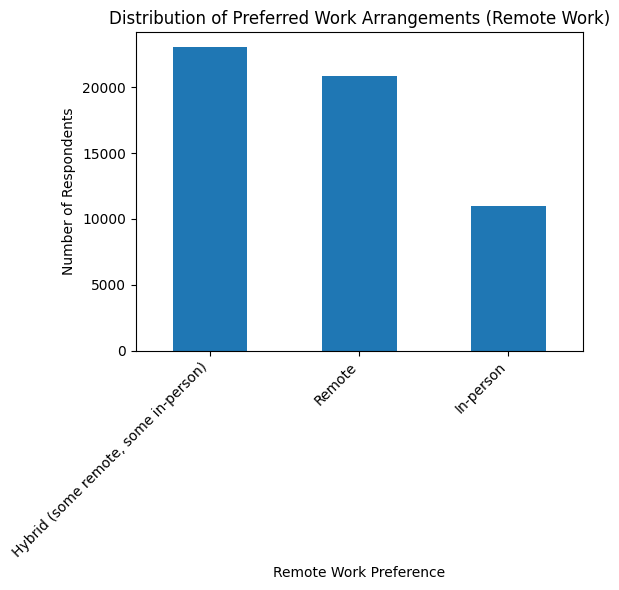

In [14]:
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""

df_remote_work = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each remote work preference
remote_work_counts = df_remote_work['RemoteWork'].value_counts()

# Create a figure and axes for the plot
plt.figure(figsize=(6, 6))

# Plot a histogram/bar chart of remote work preferences
remote_work_counts.plot(kind='bar')

plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Preferred Work Arrangements (Remote Work)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


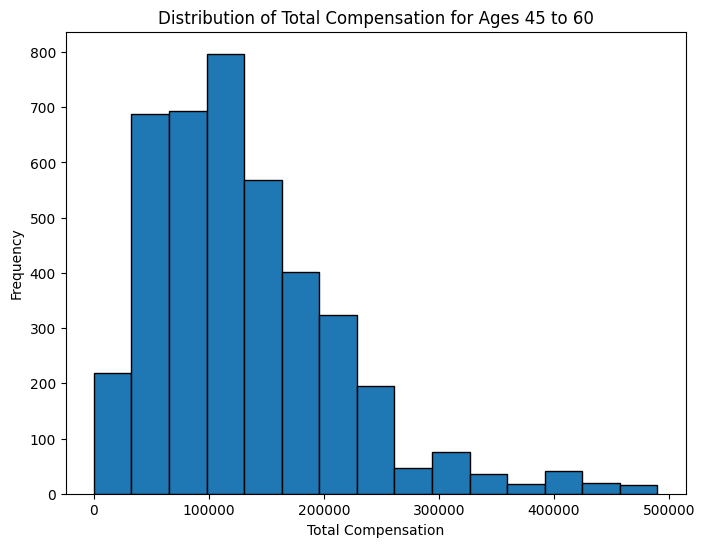

In [16]:
QUERY = """
SELECT CompTotal
FROM main
WHERE Age BETWEEN 45 AND 60
"""

df_mid_career_comptotal = pd.read_sql_query(QUERY, conn)

# Convert 'CompTotal' to numeric, coercing errors
df_mid_career_comptotal['CompTotal'] = pd.to_numeric(df_mid_career_comptotal['CompTotal'], errors='coerce')
# Remove rows where 'CompTotal' is NaN after coercion
df_mid_career_comptotal.dropna(subset=['CompTotal'], inplace=True)

# Filter out extremely large values that might skew the visualization
df_mid_career_comptotal = df_mid_career_comptotal[df_mid_career_comptotal['CompTotal'] < 500000].copy()

plt.figure(figsize=(8, 6))
plt.hist(df_mid_career_comptotal['CompTotal'], bins=15, edgecolor='black')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation for Ages 45 to 60')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


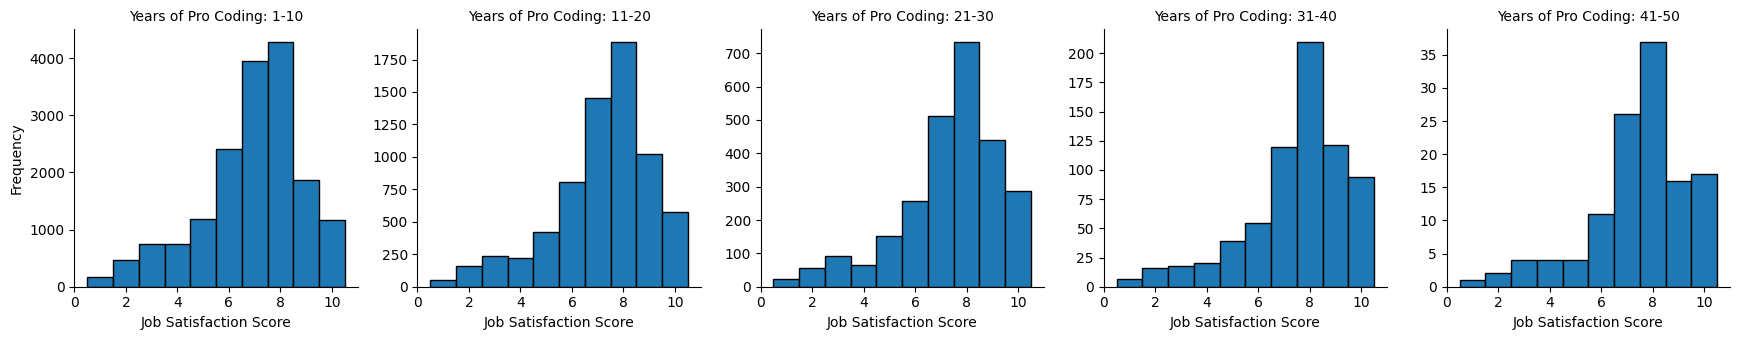

In [17]:
QUERY = """
SELECT YearsCodePro, JobSat
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""

df_jobsat_yearscodepro = pd.read_sql_query(QUERY, conn)

# Convert 'YearsCodePro' to numeric, coercing errors
df_jobsat_yearscodepro['YearsCodePro'] = pd.to_numeric(df_jobsat_yearscodepro['YearsCodePro'], errors='coerce')
# Convert 'JobSat' to numeric, coercing errors
df_jobsat_yearscodepro['JobSat'] = pd.to_numeric(df_jobsat_yearscodepro['JobSat'], errors='coerce')

# Remove rows where either 'YearsCodePro' or 'JobSat' is NaN after coercion
df_jobsat_yearscodepro.dropna(subset=['YearsCodePro', 'JobSat'], inplace=True)

min_year = int(df_jobsat_yearscodepro['YearsCodePro'].min())
max_year = int(df_jobsat_yearscodepro['YearsCodePro'].max())

bin_step = 10
bins = list(range(min_year, max_year + bin_step, bin_step))
if max_year > bins[-1]:
    bins.append(max_year + 1)


labels = [f'{i}-{j-1}' for i, j in zip(bins[:-1], bins[1:])]
if labels:
    labels[-1] = f'{bins[-2]}-{bins[-1]-1}'

df_jobsat_yearscodepro['YearsCodePro_Bins'] = pd.cut(df_jobsat_yearscodepro['YearsCodePro'], bins=bins, labels=labels, right=False, include_lowest=True)

# Drop rows where 'YearsCodePro_Bins' is NaN
df_jobsat_yearscodepro.dropna(subset=['YearsCodePro_Bins'], inplace=True)

# Sort the DataFrame by the categorical bins for ordered plotting
df_jobsat_yearscodepro['YearsCodePro_Bins'] = df_jobsat_yearscodepro['YearsCodePro_Bins'].cat.reorder_categories(labels, ordered=True)
df_jobsat_yearscodepro.sort_values('YearsCodePro_Bins', inplace=True)


# Create a FacetGrid for plotting histograms by YearsCodePro bins
col_wrap_val = min(len(labels), 6) # Limit col_wrap to a reasonable number
g = sns.FacetGrid(df_jobsat_yearscodepro, col='YearsCodePro_Bins', col_wrap=col_wrap_val, height=3.5, aspect=1, sharey=False) # sharey=False for comparing distributions

# Plot a histogram of JobSat for each YearsCodePro bin
g.map(plt.hist, 'JobSat', bins=range(1, 12), edgecolor='black', align='left') # JobSat from 1 to 10, bins up to 11 for left alignment
g.set_axis_labels('Job Satisfaction Score', 'Frequency')
g.set_titles('Years of Pro Coding: {col_name}')

plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [18]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
